## Syllable Analysis

#### This notebook demonstrates common analyses of syllable statistics derived from keypoint-MoSeq. 

- Make a copy of this notebook if you plan to make changes and want them saved
- Go to "Runtime">"change runtime type" and select "Python 3". This notebook does not require a GPU.
- If you have not already run the keypoint MoSeq tutorial, download [example output](https://drive.google.com/drive/folders/1Fh9gWCsIqvV8Kl2BDtZxVNIH08sn7yxz?usp=share_link) to your drive or create a shortcut to it. 


### Load modeling results

- `project_dir` should point to the example data or to the project directory you used for modeling
- `name` specifies which modeling output to use; it should be a subdirectory of `project_dir`

In [1]:
import keypoint_moseq as kpm
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [2]:
project_dir = 'demo_project'
name = '2022_11_19-17_58_32'

# define config loader
config = lambda: kpm.load_config(project_dir)

# load modeling results: `results` is a dict mapping each 
# experiment to a sub-dict with time-series of model outputs, 
# including syllable sequence, centroid and heading. 
results = kpm.load_results(project_dir=project_dir, name=name)

In [15]:
keys = list(results.keys())
stateseq = results[keys[0]]['syllables_reindexed']

In [16]:
T = kpm.count_transitions(100, np.ones((1,len(stateseq))), stateseq[None])

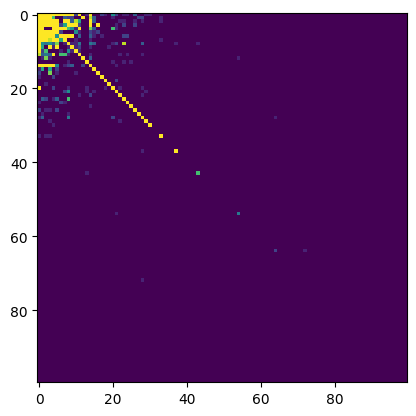

In [17]:
plt.imshow(T, vmax=10)

### Collate results into a dataframe


Combine syllables and scalar-measures of behvior (velocity, centroid, etc.) into a single `DataFrame` that includes all experimental recordings. The `DataFrame` format is required for the remainder of this notebook generally is a useful way to organize data and export it for downstream analysis. 

#### *The first few rows of `moseq_df` are rendered after the following cell is executed*

In [13]:
moseq_df = kpm.compute_moseq_df(results, **config())
print('moseq_df has shape', moseq_df.shape)
moseq_df.head()

moseq_df has shape (643911, 26)


,centroid_x,centroid_y,spine4_x,spine4_y,spine3_x,spine3_y,spine2_x,spine2_y,spine1_x,spine1_y,...,left ear_x,left ear_y,heading,velocity_px_s,syllable,syllables_reindexed,frame_index,session_name,uuid,onset
0,246.479555,211.987398,219.219840,256.431242,236.405798,243.607870,245.764741,225.189026,250.115506,207.861410,...,263.988125,202.397870,-1.221816,0.000000,25,2,0,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,b6d7c1d8-f53b-4428-af6c-0a132890aeac,True
1,248.188612,210.411177,239.326166,246.283269,241.899613,232.832086,245.285457,217.800940,248.668912,205.145959,...,259.164833,200.829359,-1.221816,69.748198,25,2,1,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,b6d7c1d8-f53b-4428-af6c-0a132890aeac,False
2,248.984787,208.094149,231.959802,253.865606,238.457286,236.929449,245.385100,217.708221,251.058030,201.599781,...,263.544243,196.542721,-1.234880,73.500087,25,2,2,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,b6d7c1d8-f53b-4428-af6c-0a132890aeac,False
3,249.002826,205.838161,232.076840,251.922132,238.488585,234.904174,245.458446,215.673095,251.164040,199.549324,...,263.985727,194.704038,-1.234880,67.681806,25,2,3,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,b6d7c1d8-f53b-4428-af6c-0a132890aeac,False
4,247.835086,203.159543,231.892330,250.689243,238.429088,233.255039,244.893595,213.418216,249.917141,196.727724,...,262.601353,191.094714,-1.253853,87.662684,25,2,4,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,b6d7c1d8-f53b-4428-af6c-0a132890aeac,False


### Add group labels
Use the following cell to assign a group label to each recording. Group labels are required for group-wise comparisons, e.g. to analyze differences in syllable frequency across conditions. 
- Based on the list of sessions in the dataframe below, create a matching list of group labels.
- The n'th group label in your list will be assigned to the session in the n'th row of the dataframe

In [14]:
group_lbl_df = moseq_df[['session_name', 'uuid']].drop_duplicates(['uuid'])
print('Session information below')
group_lbl_df

Session information below


,session_name,uuid
0,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,b6d7c1d8-f53b-4428-af6c-0a132890aeac
71524,21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...,6fa05ec5-085c-4cf6-88f8-92ec7c7c18f6
125036,21_12_10_def6a_3.top.irDLC_resnet50_moseq_exam...,f13d18f2-9a58-4b09-9b13-0b10d8db90e5
160854,21_12_10_def6b_3.top.irDLC_resnet50_moseq_exam...,bc1ce583-5465-4434-8744-440ff38f0864
214381,21_12_2_def6a_1.top.irDLC_resnet50_moseq_examp...,4f04caf3-5e55-45cd-82ca-a0ef57604a1f
321888,21_12_2_def6b_2.top.irDLC_resnet50_moseq_examp...,61a60b8e-5fcf-4668-9fa0-6858a7c384ae
429408,22_04_26_cage4_0.top.irDLC_resnet50_moseq_exam...,e49dc6ee-7c52-4025-a684-aa7baa656955
483031,22_04_26_cage4_0_2.top.irDLC_resnet50_moseq_ex...,33c2be16-015e-4de0-be7b-146dfbfcf3ee
536656,22_04_26_cage4_1_1.top.irDLC_resnet50_moseq_ex...,b483bf12-347a-4a33-a371-a99d2be172dd
590288,22_27_04_cage4_mouse2_0.top.irDLC_resnet50_mos...,6df55a98-ac87-4f15-8e36-30a5158fac31


#### *The first few rows of `moseq_df` are rendered after the following cell is executed*

In [15]:
# assign group labels.
group_labels = [
    'group1',
    'group2',
    'group1',
    'group2',
    'group1',
    'group1',
    'group2',
    'group2',
    'group1',
    'group2',
]

# merge group labels into moseq_df
group_lbl_df['group'] = group_labels
group_lbl_df=group_lbl_df.drop(['session_name'], axis=1)
moseq_df = pd.merge(moseq_df, group_lbl_df, how = 'right', on='uuid')
moseq_df.head()

,centroid_x,centroid_y,spine4_x,spine4_y,spine3_x,spine3_y,spine2_x,spine2_y,spine1_x,spine1_y,...,left ear_y,heading,velocity_px_s,syllable,syllables_reindexed,frame_index,session_name,uuid,onset,group
0,246.479555,211.987398,219.219840,256.431242,236.405798,243.607870,245.764741,225.189026,250.115506,207.861410,...,202.397870,-1.221816,0.000000,25,2,0,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,b6d7c1d8-f53b-4428-af6c-0a132890aeac,True,group1
1,248.188612,210.411177,239.326166,246.283269,241.899613,232.832086,245.285457,217.800940,248.668912,205.145959,...,200.829359,-1.221816,69.748198,25,2,1,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,b6d7c1d8-f53b-4428-af6c-0a132890aeac,False,group1
2,248.984787,208.094149,231.959802,253.865606,238.457286,236.929449,245.385100,217.708221,251.058030,201.599781,...,196.542721,-1.234880,73.500087,25,2,2,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,b6d7c1d8-f53b-4428-af6c-0a132890aeac,False,group1
3,249.002826,205.838161,232.076840,251.922132,238.488585,234.904174,245.458446,215.673095,251.164040,199.549324,...,194.704038,-1.234880,67.681806,25,2,3,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,b6d7c1d8-f53b-4428-af6c-0a132890aeac,False,group1
4,247.835086,203.159543,231.892330,250.689243,238.429088,233.255039,244.893595,213.418216,249.917141,196.727724,...,191.094714,-1.253853,87.662684,25,2,4,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,b6d7c1d8-f53b-4428-af6c-0a132890aeac,False,group1


#### [optional] export moseq_df

The following command saves `moseq_df` to the csv file `[project_dir]/[name]/moseq_df.csv`

In [16]:
# moseq_df.to_csv(os.path.join(project_dir, name, 'moseq_df.csv'))

### Aggregate statistics for each recording

`kpm.compute_stats_df` creates a `stats_df` dataframe with statistical summaries for each recording session and group, including the min, max, mean, and std of scalar values associated with each syllable, as well as each syllable's frequency. `stats_df` is then used to plot syllable statistics and perform hypothesis testing.

#### *The first few rows of `stats_df` are rendered after the following cell is executed*

In [17]:
stats_df = kpm.compute_stats_df(moseq_df, groupby=['group','uuid'], **config())
stats_df.head()

,group,uuid,syllable,session_name,usage,duration,heading_mean,heading_std,heading_min,heading_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max
0,group1,4f04caf3-5e55-45cd-82ca-a0ef57604a1f,0,21_12_2_def6a_1.top.irDLC_resnet50_moseq_examp...,0.197834,0.432413,0.105453,1.510184,-3.141455,3.140922,17.817904,14.104263,0.115047,233.480251
1,group1,61a60b8e-5fcf-4668-9fa0-6858a7c384ae,0,21_12_2_def6b_2.top.irDLC_resnet50_moseq_examp...,0.159450,0.395989,0.273958,1.791968,-3.141338,3.141279,19.014678,15.541638,0.057817,232.689914
2,group1,b483bf12-347a-4a33-a371-a99d2be172dd,0,22_04_26_cage4_1_1.top.irDLC_resnet50_moseq_ex...,0.146524,0.382285,-0.119220,1.692384,-3.141407,3.141380,18.499118,15.875624,0.451448,322.119707
3,group1,b6d7c1d8-f53b-4428-af6c-0a132890aeac,0,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,0.149923,0.420888,0.399703,1.554570,-3.140302,3.141579,19.498997,17.128812,0.180095,198.068304
4,group1,f13d18f2-9a58-4b09-9b13-0b10d8db90e5,0,21_12_10_def6a_3.top.irDLC_resnet50_moseq_exam...,0.307917,0.520656,0.049623,2.131390,-3.141322,3.141275,17.162327,11.960053,0.210220,172.876201


#### [optional] export moseq_df

The following command saves `stats_df` to the csv file `[project_dir]/[name]/stats_df.csv`

In [19]:
# stats_df.to_csv(os.path.join(project_dir, name, 'stats_df.csv'))

### Generate behavioral fingerprint plots
Fingerprints plots summarize behavior by showing distributions of kinematic scalars and syllable frequencies.

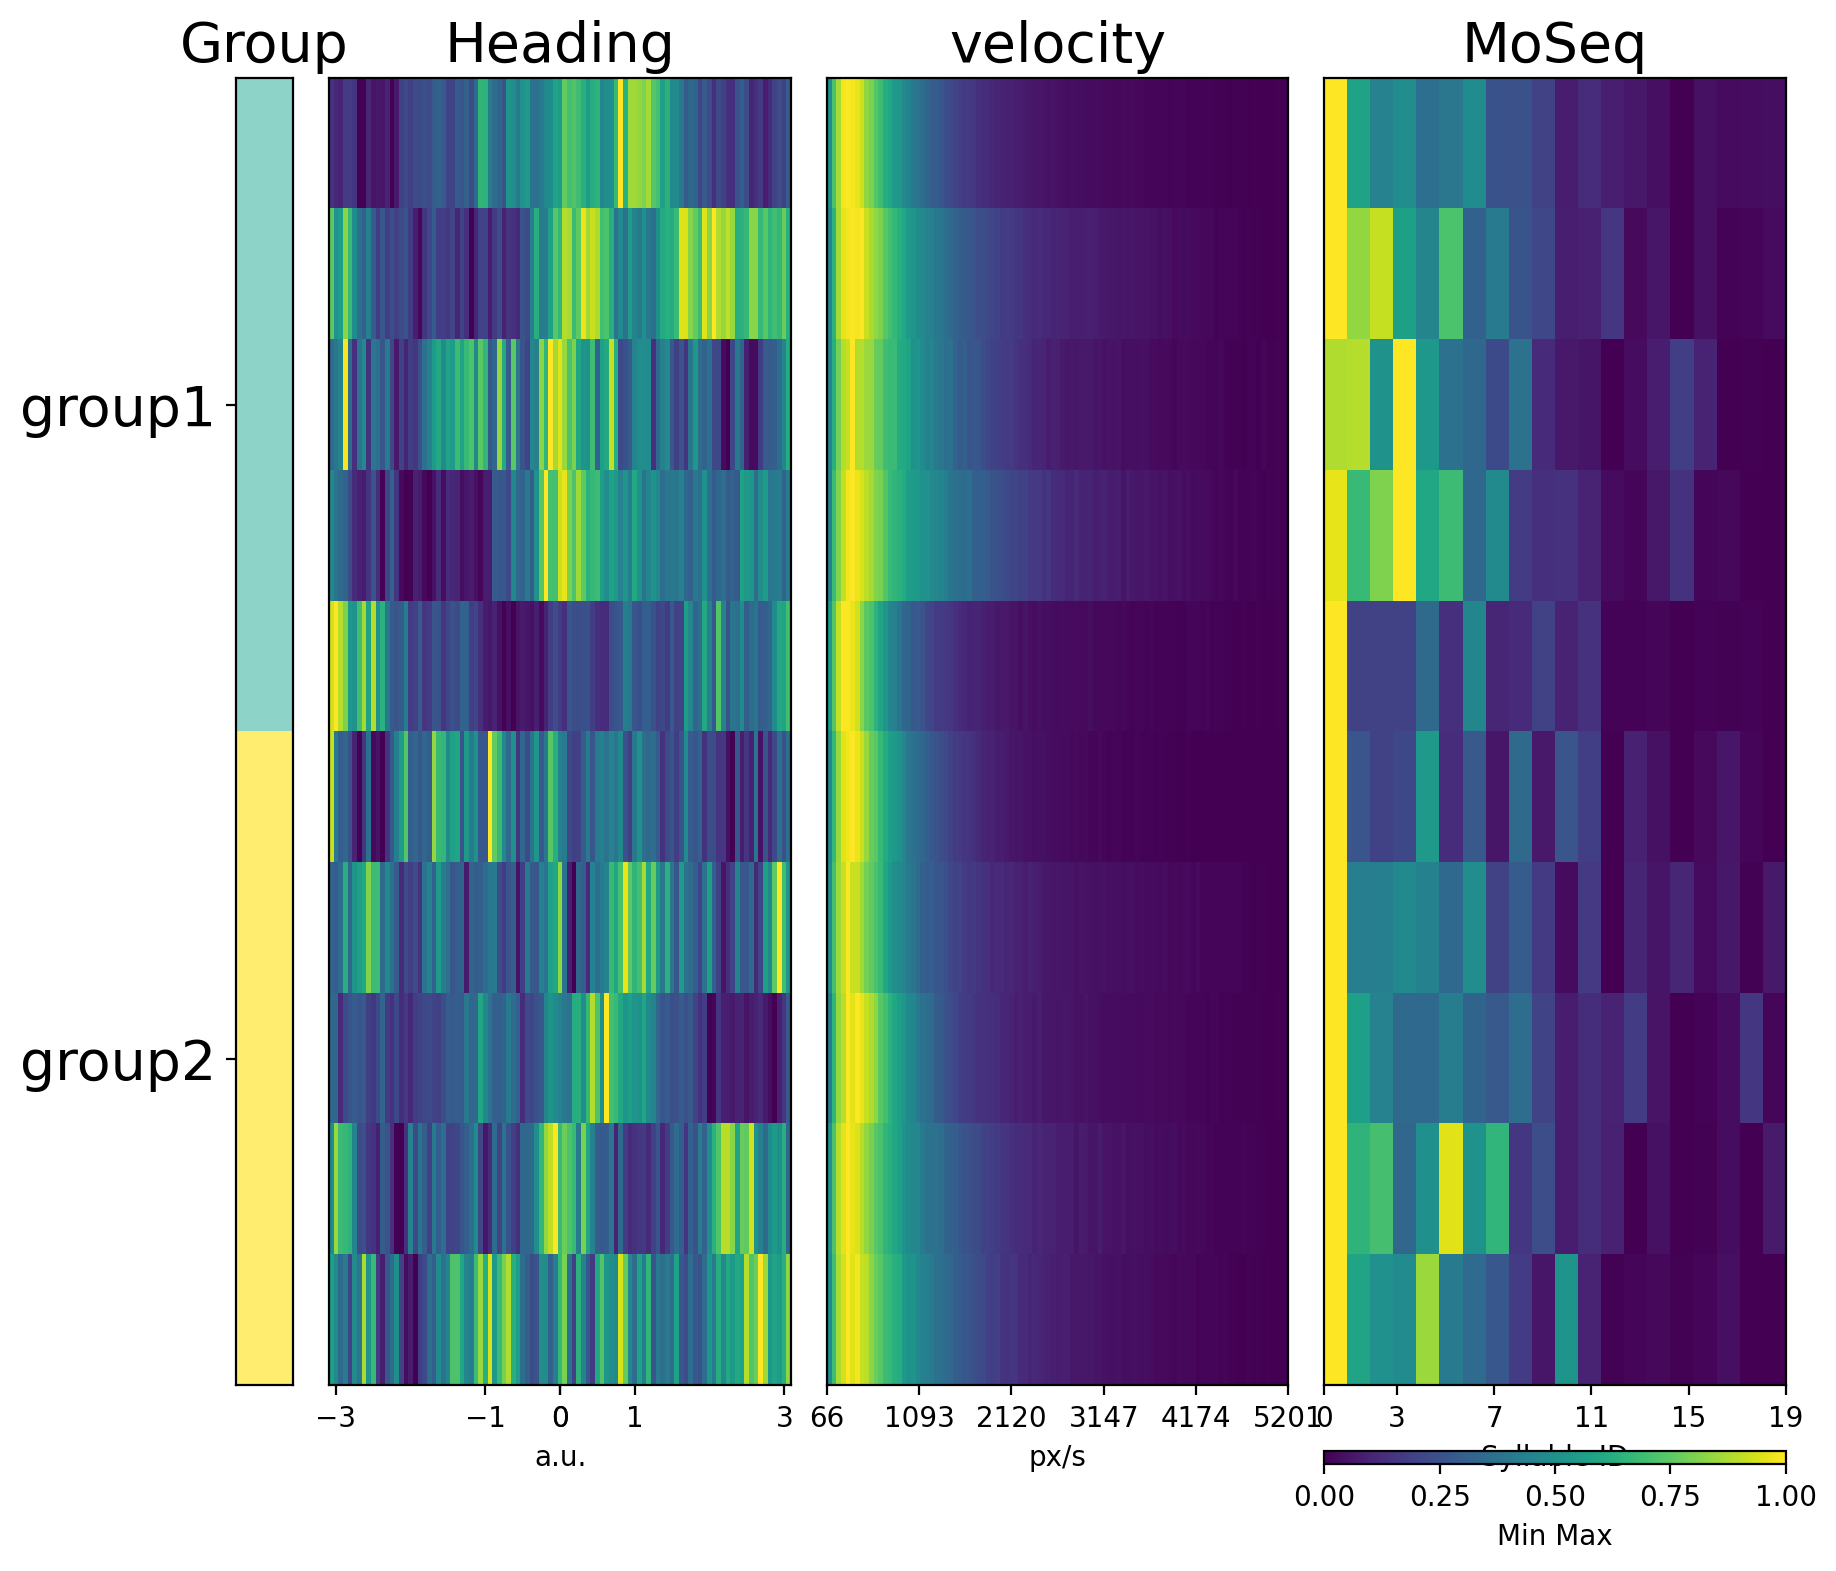

In [24]:
summary, range_dict = kpm.create_fingerprint_dataframe(moseq_df, stats_df)
kpm.plotting_fingerprint(summary, range_dict)

### Generate syllable frequency plots
Compare the frequency of each syllable across groups

(<Figure size 800x400 with 1 Axes>,
 <matplotlib.legend.Legend at 0x7f4174b771c0>)

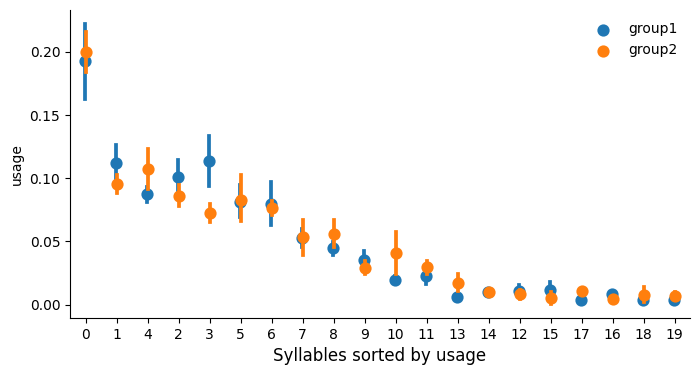

In [21]:
# groups to be plotted
groups = ['group1','group2']

# name of the control group
ctrl_group = ['group1']

# name of the experimental group
exp_group = ['group2']

kpm.plot_syll_stats_with_sem(stats_df, groups=groups, ctrl_group=ctrl_group, exp_group=exp_group)

## Transition matrices
Transition matrices compactly represent the frequency any syllable transitions into any other syllable and is one way to describe structure in behavior.
The row of the transition matrix represents an incoming syllable, while the column represents the outgoing syllable and the value at a specific row and column position represent the frequency the incoming syllable transitions into the outgoing syllable.

These plots can help visualize gross changes in the structure of behavior between two experimental groups. For example, certain syllables that frequently transition into one set of syllables in one experimental condition might transition into a completely different set in another experimental condition.

In [25]:
# set maximum syllable to include
max_syllables = int(stats_df.syllable.max())
print('maximum syllable to include:', max_syllables)
# select a transition matrix normalization method
normalize='bigram' # options: bigram, columns, rows

# Get modeled session uuids to compute group-mean transition graph for each group
syll_key = 'syllables_reindexed'
uuid_groups = stats_df[['uuid', 'group', 'session_name']].drop_duplicates(['uuid']).to_numpy()
label_group, uuids, sessions = uuid_groups[:,1], uuid_groups[:, 0], uuid_groups[:,2]
group = list(set(label_group))
print('Group(s):', ', '.join(group))
model_labels = [results[session][syll_key] for session in sessions]
# compute transition matrices and usages for each group
trans_mats, usages = kpm.get_group_trans_mats(model_labels, label_group, group, max_sylls=max_syllables, normalize=normalize)


maximum syllable to include: 19
Group(s): group1, group2


Computing bigram transition probabilities: 100%|██████████| 5/5 [00:00<00:00, 203.74it/s]


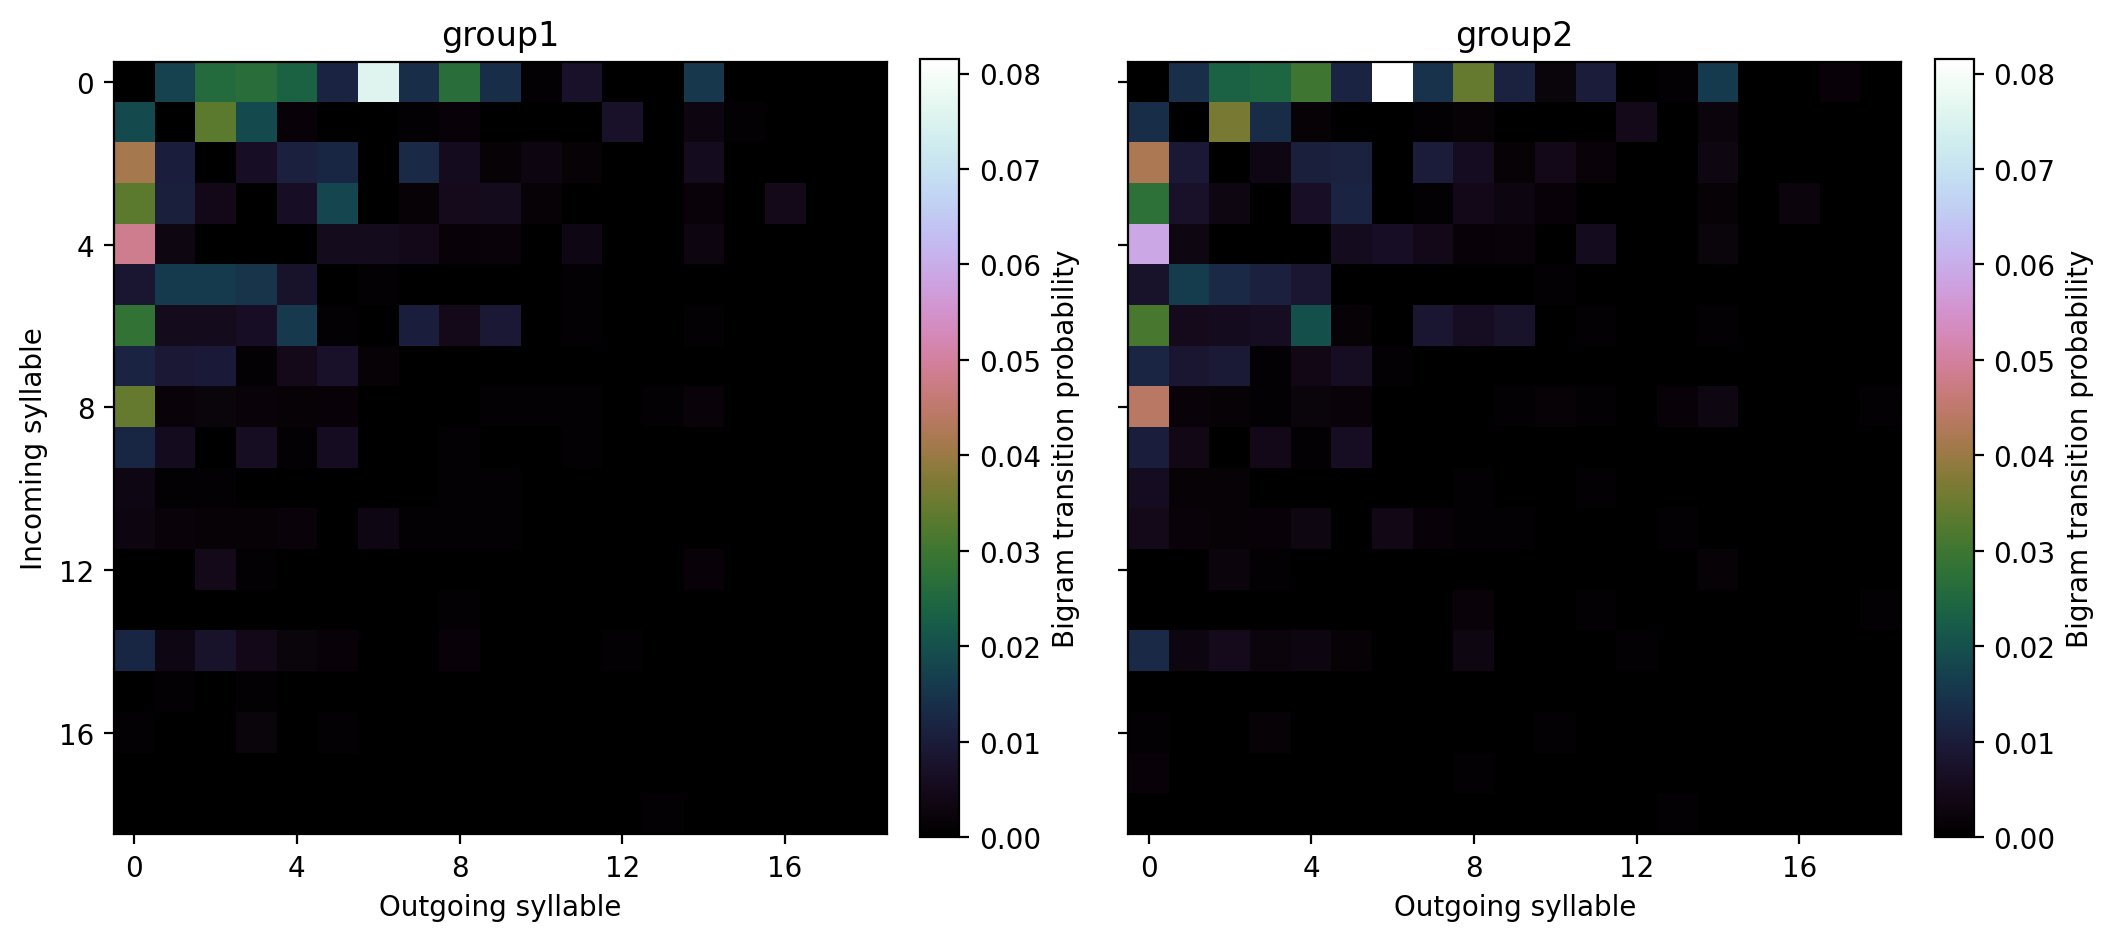

In [26]:
# plot the trnsition matrices
fig, ax = plt.subplots(1, len(group), figsize=(12, 15), sharex=False, sharey=True)
title_map = dict(bigram='Bigram', columns='Incoming', rows='Outgoing')

# max color threshold for graphs - set to any value 
color_lim = max([x.max() for x in trans_mats])

for i, g in enumerate(group):
    h = ax[i].imshow(trans_mats[i][:max_syllables,:max_syllables], cmap='cubehelix', vmax=color_lim)
    if i == 0:
        ax[i].set_ylabel('Incoming syllable')
        plt.yticks(np.arange(0, max_syllables, 4))
    cb = fig.colorbar(h, ax=ax[i], fraction=0.046, pad=0.04)
    cb.set_label(f'{title_map[normalize]} transition probability')
    ax[i].set_xlabel('Outgoing syllable')
    ax[i].set_title(g)
    ax[i].set_xticks(np.arange(0, max_syllables, 4))
    